In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import jieba

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wangzihan\AppData\Local\Temp\jieba.cache
Loading model cost 0.646 seconds.
Prefix dict has been built successfully.


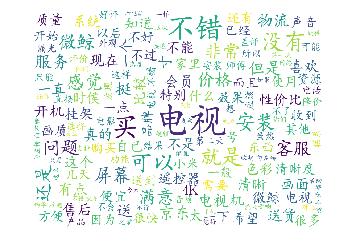

In [2]:
#词云

# 保存X到txt
X = pd.read_csv('data.csv', encoding='utf-8', usecols=['evaluation']).to_csv('fenci.txt', index=False, header=False, encoding='utf-8')

def word_cloud(filepath,outpass):

    # 打开文本文件，读取内容
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()

    # 使用jieba对文本进行分词
    words = jieba.cut(text)

    # 将分词结果转换为空格分隔的字符串
    words_str = ' '.join(words)

    #停词
    std = open('./stopwords.txt',encoding="utf-8").read()

    # 生成词云
    wc = WordCloud(
        # 参数列表
        font_path='./HGKT_CNKI.TTF',  # 设置字体
        background_color='white',  # 设置背景颜色
        width=800,  # 设置宽度
        height=600,  # 设置高度
        max_words=150,  # 设置最大词数
        max_font_size=100,  # 设置最大字体大小
        stopwords=std # 设置停用词
    )

    # 生成词云图片
    wc.generate(words_str)
    # 显示词云图片
    plt.imshow(wc)
    plt.axis('off')
    # 返回词云图片plt对象,module类型
    # 可以使用plt.show()显示图片
    # 也可以使用plt.savefig()保存图片
    plt.savefig(outpass)
    return plt
    # plt.show()


if __name__ == '__main__':
    filepath = './fenci.txt'
    plt = word_cloud(filepath,'./wc.png')
    plt.show()

In [3]:

# 导入数据
data = pd.read_csv('data.csv',encoding='utf-8')
data.head()

,evaluation,label
0,用了一段时间，感觉还不错，可以,1
1,电视非常好，已经是家里的第二台了。第一天下单，第二天就到本地了，可是物流的人说车坏了，一直催...,1
2,电视比想象中的大好多，画面也很清晰，系统很智能，更多功能还在摸索中,1
3,不错,1
4,用了这么多天了，感觉还不错。夏普的牌子还是比较可靠。希望以后比较耐用，现在是考量质量的时候。,1


In [4]:
# 测试 只对第一行分词
word = jieba.cut(data.iloc[1]['evaluation'])
result = ' '.join(word)
result

'电视 非常 好 ， 已经 是 家里 的 第二台 了 。 第一天 下单 ， 第二天 就 到 本地 了 ， 可是 物流 的 人 说 车坏 了 ， 一直 催 ， 客服 也 帮 着 催 ， 到 第三天 下午 5 点才 送过来 。 父母 年纪 大 了 ， 买个 大 电视 画面 清晰 ， 趁着 耳朵 还好 使 ， 享受 几年 。'

In [5]:
# 对所有数据分词
words= []
for i,row in  data.iterrows():
    word = jieba.cut(row['evaluation'])
    result = '  '.join(word)
    words.append(result)

print(words)


['用  了  一段时间  ，  感觉  还  不错  ，  可以', '电视  非常  好  ，  已经  是  家里  的  第二台  了  。  第一天  下单  ，  第二天  就  到  本地  了  ，  可是  物流  的  人  说  车坏  了  ，  一直  催  ，  客服  也  帮  着  催  ，  到  第三天  下午  5  点才  送过来  。  父母  年纪  大  了  ，  买个  大  电视  画面  清晰  ，  趁着  耳朵  还好  使  ，  享受  几年  。', '电视  比  想象  中  的  大  好多  ，  画面  也  很  清晰  ，  系统  很  智能  ，  更  多功能  还  在  摸索  中', '不错', '用  了  这么  多天  了  ，  感觉  还  不错  。  夏普  的  牌子  还是  比较  可靠  。  希望  以后  比较  耐用  ，  现在  是  考量  质量  的  时候  。', '物流  速度  很快  ，  非常  棒  ，  今天  就  看  了  电视  ，  非常  清晰  ，  非常  流畅  ，  一次  非常  完美  的  购物  体验', '非常  好  ，  客服  还  特意  打电话  做  回访', '物流  小哥  不错  ，  辛苦  了  ，  东西  还  没用', '送货  速度  快  ，  质量  有  保障  ，  活动  价格  挺  好  的  。  希望  用  的  久  ，  不  出  问题  。', '非常  漂亮  ，  也  非常  清晰  ，  反应速度  也  快  。', '很  不错  家里  都  喜欢  。  。  。  一次  买  了  三台', '送货  非常  快  ！  质量  非常  好  ，  这次  购物  非常  愉快  ！  ！', '58  好大  …  …  都  不错  。  看  质量  咯', '物流  很快  ，  物有所值  ，  值得  信赖  。  依旧会  关顾  ！  谢谢  商家  ！', '这  价钱  超值  ，  收到  货  马上  装上  看  了  一下  。  很  清晰  式样  也  蛮  好  ！  赞赞  …  

In [6]:
# 特征向量化
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(words)
X = X.toarray()

# 查看向量化后的词袋
wordbag = vectorizer.vocabulary_
print(wordbag)


{'一段时间': 656, '感觉': 4113, '不错': 1005, '可以': 2471, '电视': 5869, '非常': 7789, '已经': 3632, '家里': 3398, '第二台': 6259, '第一天': 6241, '下单': 804, '第二天': 6260, '本地': 5090, '可是': 2486, '物流': 5723, '车坏': 7215, '一直': 673, '客服': 3377, '第三天': 6254, '下午': 803, '点才': 5647, '送过来': 7463, '父母': 5697, '年纪': 3706, '买个': 1182, '画面': 5895, '清晰': 5559, '趁着': 7150, '耳朵': 6564, '还好': 7315, '享受': 1298, '几年': 1924, '想象': 4092, '好多': 3204, '系统': 6347, '智能': 4929, '多功能': 2937, '摸索': 4576, '这么': 7342, '多天': 2949, '夏普': 2898, '牌子': 5717, '还是': 7321, '比较': 5344, '可靠': 2501, '希望': 3648, '以后': 1403, '耐用': 6559, '现在': 5773, '考量': 6551, '质量': 7082, '时候': 4848, '速度': 7506, '很快': 3900, '今天': 1352, '流畅': 5506, '一次': 652, '完美': 3336, '购物': 7095, '体验': 1521, '特意': 5739, '打电话': 4248, '回访': 2750, '小哥': 3458, '辛苦': 7249, '东西': 1031, '没用': 5451, '送货': 7457, '保障': 1575, '活动': 5500, '价格': 1419, '问题': 7688, '漂亮': 5598, '反应速度': 2363, '喜欢': 2696, '三台': 737, '这次': 7365, '愉快': 4094, '58': 245, '好大': 3209, '物有所值': 5722, '值得': 1612, '信赖': 159

In [7]:
#查看词袋长度，有多少个词
len(wordbag)

7976

In [8]:
# 转换成DataFrame
X = pd.DataFrame(X)
# 提取目标变量
y = data['label']
print(X.shape)
print(y.shape)

(4283, 7976)
(4283,)


In [11]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 1)
# 玻尔兹曼机
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

# 保存模型
import pickle
with open('mlp.pkl','wb') as f:
    pickle.dump(mlp,f)

# 预测
y_pred = mlp.predict(X_test)
# 评估
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

comment = input("请输入你对商品的评价：")
comment = [' '.join(jieba.cut(comment))]
print(comment)
X_try = vectorizer.transform(comment)
y_pred = mlp.predict(X_try.toarray())
print(y_pred)



['很 好']
[1]


In [14]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

# 保存模型
import pickle
with open('svm.pkl','wb') as f:
    pickle.dump(svm,f)

# 预测
y_pred = svm.predict(X_test)
# 评估
score = accuracy_score(y_pred,y_test)

# comment = input("请输入你对商品的评价：")
# comment = [' '.join(jieba.cut(comment))]
# print(comment)
# X_try = vectorizer.transform(comment)
# y_pred = mlp.predict(X_try.toarray())
# print(y_pred)
print(score)


0.9114219114219114


In [15]:
# NB模型
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

# 保存模型
import pickle
with open('nb.pkl','wb') as f:
    pickle.dump(nb,f)

# 预测
y_pred = nb.predict(X_test)
# 评估
score = accuracy_score(y_pred,y_test)

print(score)

0.9044289044289044


In [16]:
# KNN模型
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# 保存模型
import pickle
with open('knn.pkl','wb') as f:
    pickle.dump(knn,f)

# 预测
y_pred = knn.predict(X_test)
# 评估
score = accuracy_score(y_pred,y_test)

print(score)

0.655011655011655


In [ ]:
# LR模型
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

# 保存模型
import pickle
with open('lr.pkl','wb') as f:
    pickle.dump(lr,f)

# 预测
y_pred = lr.predict(X_test)

# 评估
score = accuracy_score(y_pred,y_test)